Lab 11 | Modulation and sampling

Made by Dmitriy Sokolov, 3530901/00203

### Part 1

Read example *chap11.ipynb* and listen to sounds.

-----

### Part 2

Watch the YouTube [video](www.youtube.com/watch?v=cIQ9IXSUzuM)

-----

### Part 3

Apply low-frequencies filter before sampling, and then, with LF filter, remove spectral copies of sampling.

Firstly, load the wave:

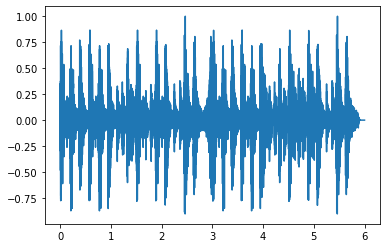

In [2]:
from labs.thinkdsp import read_wave

wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
wave.normalize()
wave.plot()

It sounds like:

In [3]:
wave.make_audio()

And its spectrum:

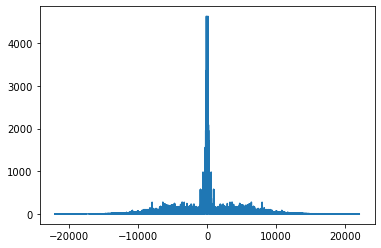

In [4]:
spectrum = wave.make_spectrum(full=True)
spectrum.plot()

Reduce sampling rate on factor of two:

In [5]:
factor = 2
framerate = wave.framerate / factor
cutoff = framerate / 2 - 1

And filter low-frequiencies:

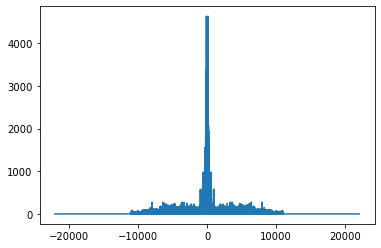

In [6]:
spectrum.low_pass(cutoff)
spectrum.plot()

Filtered version sounds like:

In [7]:
filtered = spectrum.make_wave()
filtered.make_audio()

Simulate sampling:

In [9]:
from labs.thinkdsp import Wave
import numpy as np

def sample(wave, factor):
    """Simulates sampling of a wave.

    wave: Wave object
    factor: ratio of the new framerate to the original
    """
    ys = np.zeros(len(wave))
    ys[::factor] = np.real(wave.ys[::factor])
    return Wave(ys, framerate=wave.framerate)

Call the sampling and create audio:

In [10]:
sampled = sample(filtered, factor)
sampled.make_audio()

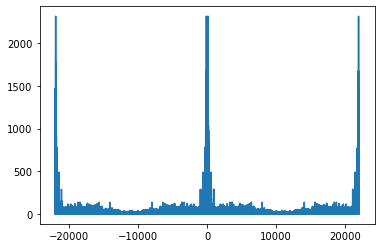

In [11]:
sampled_spectrum = sampled.make_spectrum(full=True)
sampled_spectrum.plot()

Remove spectral copies:

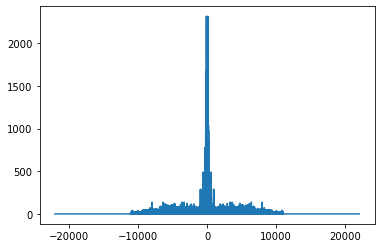

In [12]:
sampled_spectrum.low_pass(cutoff)
sampled_spectrum.plot()

Scale it on the previous factor of two:

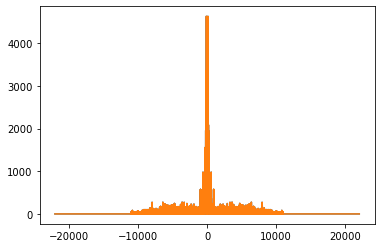

In [13]:
sampled_spectrum.scale(factor)
spectrum.plot()
sampled_spectrum.plot()

Convert back to the wave:

In [14]:
interpolated = sampled_spectrum.make_wave()
interpolated.make_audio()

And show difference on the plot: there are no difference. They are the same.

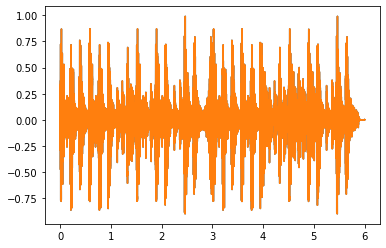

In [15]:
filtered.plot()
interpolated.plot()